<a href="https://colab.research.google.com/github/zeph0yr/Data-Mining-and-Prediction-Modelling/blob/master/LSTM_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset_train=pd.read_csv('aptrain.csv')
training_set=dataset_train.iloc[:,1:2].values
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

#creating a data structure with 60 timestamps for one output
X_train=[]
y_train=[]
for i in range(60,len(training_set_scaled)):
      X_train.append(training_set_scaled[i-60:i,0])
      y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)


In [0]:
#reshaping
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout #deactivate neurons which have value zero

#initializing RNN
regressor=Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mean_squared_error')

regressor.fit(X_train,y_train,epochs=200,batch_size=32)



Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/200





191/191 [==============================] - 4s 23ms/step - loss: 0.2207
Epoch 2/200
191/191 [==============================] - 1s 6ms/step - loss: 0.0416
Epoch 3/200
191/191 [==============================] - 1s 6ms/step - loss: 0.0230
Epoch 4/200
191/191 [==============================] - 1s 6ms/step - loss: 0.0228
Epoch 5/200
191/191 [==============================] - 1s 6ms/step - loss: 0.0192
Epoch 6/200
191/191 [==============================] - 1s 6ms/step - loss: 0.0133
Epoch 7/200
191/191 [==============================] - 1s 6ms/step - loss: 0.0114
Epoch 8/200
191/191 [==============================] - 1s 6ms/step - loss: 0.0101
Epoch 9/200
191/191 [==============================] - 1s 6ms/step - loss: 0.0090
Epoch 10/200
191/191 [=================

In [0]:
dataset_test=pd.read_csv('aptest.csv')
real_stock_price=dataset_test.iloc[:,1:2].values
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
      X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

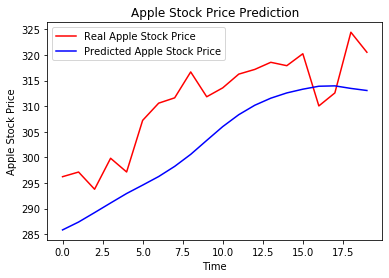

In [8]:
plt.plot(real_stock_price,color='red',label='Real Apple Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()